In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3
import argparse
import json
import pprint
import requests
import sys
import urllib
from urllib.error import HTTPError
from urllib.parse import quote
from urllib.parse import urlencode
%matplotlib inline
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('VictimInfoDetails.csv')

In [3]:
df

,District_Name,UnitName,FIRNo,Year,Month,VictimName,age,Caste,Profession,Sex,...,PermanentCity,PermanentState,Nationality_Name,DOB,PersonType,InjuryType,Injury_Nature,Crime_No,Arr_ID,Victim_ID
0,Bagalkot,Amengad PS,0001/2016,2016,1,MAHxxxxxATH,14,Lingayath,NaN,FEMALE,...,Bagalkot,Karnataka,India,NaN,Deceased,Fatal,NaN,10470124520160001,2016000004,2016000002
1,Bagalkot,Amengad PS,0004/2016,2016,1,KRIxxxxxKAR,49,NaN,NaN,MALE,...,Bagalkot,Karnataka,India,NaN,Injured,Fatal,NaN,10470124520160004,2016000016,2016000006
2,Bagalkot,Amengad PS,0004/2016,2016,1,VINxxxxxKAR,0,NaN,NaN,MALE,...,Bagalkot,Karnataka,India,NaN,Injured,Fatal,NaN,10470124520160004,2016000015,2016000005
3,Bagalkot,Amengad PS,0004/2016,2016,1,RAGxxxxxKAR,34,NaN,NaN,MALE,...,Belagavi Dist,Karnataka,India,NaN,Injured,Fatal,NaN,10470124520160004,2016000013,2016000003
4,Bagalkot,Amengad PS,0004/2016,2016,1,SANxxxxxNNU,36,NaN,NaN,MALE,...,Belagavi Dist,Karnataka,India,NaN,Injured,Fatal,NaN,10470124520160004,2016000014,2016000004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465778,Yadgir,Yadgiri Women PS,0002/2024,2024,1,Sthxxxxxthi,19,CHRISTIAN,Student,FEMALE,...,Yadgir,Karnataka,India,NaN,Missing,NaN,NaN,10978218320240002,2024000004,2024000002
1465779,Yadgir,Yadgiri Women PS,0003/2024,2024,1,Kumxxxxxmma,16,"HOLAYA, HOLER, HOLEYA",House help - hired,FEMALE,...,Yadgir,Karnataka,India,NaN,Kidnapped,NaN,NaN,10978218320240003,2024000007,2024000003
1465780,Yadgir,Yadgiri Women PS,0004/2024,2024,2,Smtxxxxxita,29,Lingayath,Teacher,FEMALE,...,Yadgir,Karnataka,India,NaN,complainnant,Abused,NaN,10978218320240004,2024000009,2024000004
1465781,Yadgir,Yadgiri Women PS,0005/2024,2024,2,Sruxxxxxthi,29,REDDY,House help - hired,FEMALE,...,Yadgir,Karnataka,India,NaN,complainnant,Abused,NaN,10978218320240005,2024000012,2024000005


In [4]:
df.columns

Index(['District_Name', 'UnitName', 'FIRNo', 'Year', 'Month', 'VictimName',
       'age', 'Caste', 'Profession', 'Sex', 'PresentAddress', 'PresentCity',
       'PresentState', 'PermanentAddress', 'PermanentCity', 'PermanentState',
       'Nationality_Name', 'DOB', 'PersonType', 'InjuryType', 'Injury_Nature',
       'Crime_No', 'Arr_ID', 'Victim_ID'],
      dtype='object')

In [5]:
df.isnull() .sum()

District_Name             0
UnitName                  0
FIRNo                     0
Year                      0
Month                     0
VictimName             1094
age                       0
Caste                188647
Profession           180728
Sex                     227
PresentAddress            0
PresentCity             105
PresentState            948
PermanentAddress          0
PermanentCity           105
PermanentState          948
Nationality_Name          4
DOB                 1421724
PersonType                0
InjuryType           456136
Injury_Nature       1438422
Crime_No                  0
Arr_ID                    0
Victim_ID                 0
dtype: int64

In [6]:
df=df.drop(["Caste"],axis=1)

In [7]:
df

,District_Name,UnitName,FIRNo,Year,Month,VictimName,age,Profession,Sex,PresentAddress,...,PermanentCity,PermanentState,Nationality_Name,DOB,PersonType,InjuryType,Injury_Nature,Crime_No,Arr_ID,Victim_ID
0,Bagalkot,Amengad PS,0001/2016,2016,1,MAHxxxxxATH,14,NaN,FEMALE,"HUVINAHALLI,TQ-HUANGUND",...,Bagalkot,Karnataka,India,NaN,Deceased,Fatal,NaN,10470124520160001,2016000004,2016000002
1,Bagalkot,Amengad PS,0004/2016,2016,1,KRIxxxxxKAR,49,NaN,MALE,"BASAVA NAGAR GOKAK CTS 190/5 PLAT NO 2,GOKAK",...,Bagalkot,Karnataka,India,NaN,Injured,Fatal,NaN,10470124520160004,2016000016,2016000006
2,Bagalkot,Amengad PS,0004/2016,2016,1,VINxxxxxKAR,0,NaN,MALE,"BASAVA NAGAR GOKAK CTS 190/5 PLAT NO 2,GOKAK",...,Bagalkot,Karnataka,India,NaN,Injured,Fatal,NaN,10470124520160004,2016000015,2016000005
3,Bagalkot,Amengad PS,0004/2016,2016,1,RAGxxxxxKAR,34,NaN,MALE,"BASAVA NAGAR GOKAK CTS 190/5 PLAT NO 2,TQ-GOKAK",...,Belagavi Dist,Karnataka,India,NaN,Injured,Fatal,NaN,10470124520160004,2016000013,2016000003
4,Bagalkot,Amengad PS,0004/2016,2016,1,SANxxxxxNNU,36,NaN,MALE,"BASAVA NAGAR GOKAK CTS 190/5 PLAT NO 2,TQ-GOKAK",...,Belagavi Dist,Karnataka,India,NaN,Injured,Fatal,NaN,10470124520160004,2016000014,2016000004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465778,Yadgir,Yadgiri Women PS,0002/2024,2024,1,Sthxxxxxthi,19,Student,FEMALE,"R/o Hosalli Cross Near Ratnama School,yadgiri",...,Yadgir,Karnataka,India,NaN,Missing,NaN,NaN,10978218320240002,2024000004,2024000002
1465779,Yadgir,Yadgiri Women PS,0003/2024,2024,1,Kumxxxxxmma,16,House help - hired,FEMALE,"R/o Talak Village,tq dist yadgir",...,Yadgir,Karnataka,India,NaN,Kidnapped,NaN,NaN,10978218320240003,2024000007,2024000003
1465780,Yadgir,Yadgiri Women PS,0004/2024,2024,2,Smtxxxxxita,29,Teacher,FEMALE,"R/o Bilahar Village,Tq wadagera dist Yadgiri",...,Yadgir,Karnataka,India,NaN,complainnant,Abused,NaN,10978218320240004,2024000009,2024000004
1465781,Yadgir,Yadgiri Women PS,0005/2024,2024,2,Sruxxxxxthi,29,House help - hired,FEMALE,"R/o Thanagundi Village,Now at Mini Vidanasouda...",...,Yadgir,Karnataka,India,NaN,complainnant,Abused,NaN,10978218320240005,2024000012,2024000005


In [8]:
df.columns

Index(['District_Name', 'UnitName', 'FIRNo', 'Year', 'Month', 'VictimName',
       'age', 'Profession', 'Sex', 'PresentAddress', 'PresentCity',
       'PresentState', 'PermanentAddress', 'PermanentCity', 'PermanentState',
       'Nationality_Name', 'DOB', 'PersonType', 'InjuryType', 'Injury_Nature',
       'Crime_No', 'Arr_ID', 'Victim_ID'],
      dtype='object')

In [9]:
df.isnull() .sum()

District_Name             0
UnitName                  0
FIRNo                     0
Year                      0
Month                     0
VictimName             1094
age                       0
Profession           180728
Sex                     227
PresentAddress            0
PresentCity             105
PresentState            948
PermanentAddress          0
PermanentCity           105
PermanentState          948
Nationality_Name          4
DOB                 1421724
PersonType                0
InjuryType           456136
Injury_Nature       1438422
Crime_No                  0
Arr_ID                    0
Victim_ID                 0
dtype: int64

In [10]:
df.InjuryType.unique()

array(['Fatal', 'Grievous', nan, 'Minor', 'Not Applicable', 'Abused'],
      dtype=object)

In [11]:
df.InjuryType.replace({'Fatal':2,'Grievous':1,'Minor':3,'Not Applicable':4,'Abused':5},inplace=True)

In [12]:
df.InjuryType.unique()

array([ 2.,  1., nan,  3.,  4.,  5.])

In [13]:
round_Values = round(df.InjuryType.mean())
df.InjuryType.fillna(round_Values,inplace=True)

In [14]:
df=df.drop('Injury_Nature',axis=1)

In [15]:
df.Profession.unique()

array([nan, 'Housewife ', 'Driver', 'Labourer ', 'Farmer ', 'Student ',
       'Businessman ', 'Electrician ', 'Bank employee ',
       'Central Govt.Employee', 'Broker ', 'Weaver ', 'Social Worker',
       'Retired Person', 'Bus conductor', 'Teacher ', 'Police officer ',
       'Law practitioner ', 'Courier ', 'Barber', 'Driver - car ',
       'Cleaner truck ', 'Not Applicable', 'Govt. official non-gazetted ',
       'State Govt.Employee', 'Security guard ', 'Revenue Officer',
       'Others PI Specify', 'Public Sector Undertaking', 'Priest',
       'Peon ', 'Tailor ', 'Photographer ', 'Carpenter ', 'Prostitute ',
       'Nurse', 'Driver - truck ', 'Lecturer', 'Contractor ',
       'House help - hired ', 'Postal staff ', 'Driver - bus ',
       'Journalist', 'Accountant ', 'Doctor', 'PDO', 'Engineers ',
       'Surveyor ', 'Unemployed ', 'Professor', 'Jail staff ', 'Attender',
       'Builder ', 'Factory worker ', 'Religious person ',
       'Govt. official gazetted ', 'Salesman ', 'M

In [16]:
df.dropna(subset=['Profession'],inplace=True)

In [17]:
df.dropna(subset=['PresentCity'],inplace=True)

In [18]:
df.dropna(subset=['PresentState'],inplace=True)

In [19]:
df.dropna(subset=['PermanentCity'],inplace=True)

In [20]:
df.dropna(subset=['PermanentState'],inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1284251 entries, 5 to 1465782
Data columns (total 22 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   District_Name     1284251 non-null  object 
 1   UnitName          1284251 non-null  object 
 2   FIRNo             1284251 non-null  object 
 3   Year              1284251 non-null  int64  
 4   Month             1284251 non-null  int64  
 5   VictimName        1283281 non-null  object 
 6   age               1284251 non-null  int64  
 7   Profession        1284251 non-null  object 
 8   Sex               1284146 non-null  object 
 9   PresentAddress    1284251 non-null  object 
 10  PresentCity       1284251 non-null  object 
 11  PresentState      1284251 non-null  object 
 12  PermanentAddress  1284251 non-null  object 
 13  PermanentCity     1284251 non-null  object 
 14  PermanentState    1284251 non-null  object 
 15  Nationality_Name  1284249 non-null  object 
 16  DOB  

In [22]:
df.isnull().sum()

District_Name             0
UnitName                  0
FIRNo                     0
Year                      0
Month                     0
VictimName              970
age                       0
Profession                0
Sex                     105
PresentAddress            0
PresentCity               0
PresentState              0
PermanentAddress          0
PermanentCity             0
PermanentState            0
Nationality_Name          2
DOB                 1241498
PersonType                0
InjuryType                0
Crime_No                  0
Arr_ID                    0
Victim_ID                 0
dtype: int64

In [23]:
df.dropna(subset=['VictimName'],inplace=True)

In [24]:
df.Sex.unique()

array(['FEMALE', 'MALE', nan, 'Enuch'], dtype=object)

In [25]:
df.Sex.replace({'FEMALE':2,'MALE':1,'Enuch':3},inplace=True)

In [26]:
round_Values = round(df.Sex.mean())
df.Sex.fillna(round_Values,inplace=True)

In [27]:
df.isnull().sum()

District_Name             0
UnitName                  0
FIRNo                     0
Year                      0
Month                     0
VictimName                0
age                       0
Profession                0
Sex                       0
PresentAddress            0
PresentCity               0
PresentState              0
PermanentAddress          0
PermanentCity             0
PermanentState            0
Nationality_Name          2
DOB                 1240558
PersonType                0
InjuryType                0
Crime_No                  0
Arr_ID                    0
Victim_ID                 0
dtype: int64

In [28]:
df.dropna(subset=['Nationality_Name'],inplace=True)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1283279 entries, 5 to 1465782
Data columns (total 22 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   District_Name     1283279 non-null  object 
 1   UnitName          1283279 non-null  object 
 2   FIRNo             1283279 non-null  object 
 3   Year              1283279 non-null  int64  
 4   Month             1283279 non-null  int64  
 5   VictimName        1283279 non-null  object 
 6   age               1283279 non-null  int64  
 7   Profession        1283279 non-null  object 
 8   Sex               1283279 non-null  float64
 9   PresentAddress    1283279 non-null  object 
 10  PresentCity       1283279 non-null  object 
 11  PresentState      1283279 non-null  object 
 12  PermanentAddress  1283279 non-null  object 
 13  PermanentCity     1283279 non-null  object 
 14  PermanentState    1283279 non-null  object 
 15  Nationality_Name  1283279 non-null  object 
 16  DOB  

In [30]:
df = df.drop('PermanentAddress', axis=1)

In [31]:
df=df.drop('DOB',axis=1)

In [32]:
df.isnull().sum()

District_Name       0
UnitName            0
FIRNo               0
Year                0
Month               0
VictimName          0
age                 0
Profession          0
Sex                 0
PresentAddress      0
PresentCity         0
PresentState        0
PermanentCity       0
PermanentState      0
Nationality_Name    0
PersonType          0
InjuryType          0
Crime_No            0
Arr_ID              0
Victim_ID           0
dtype: int64

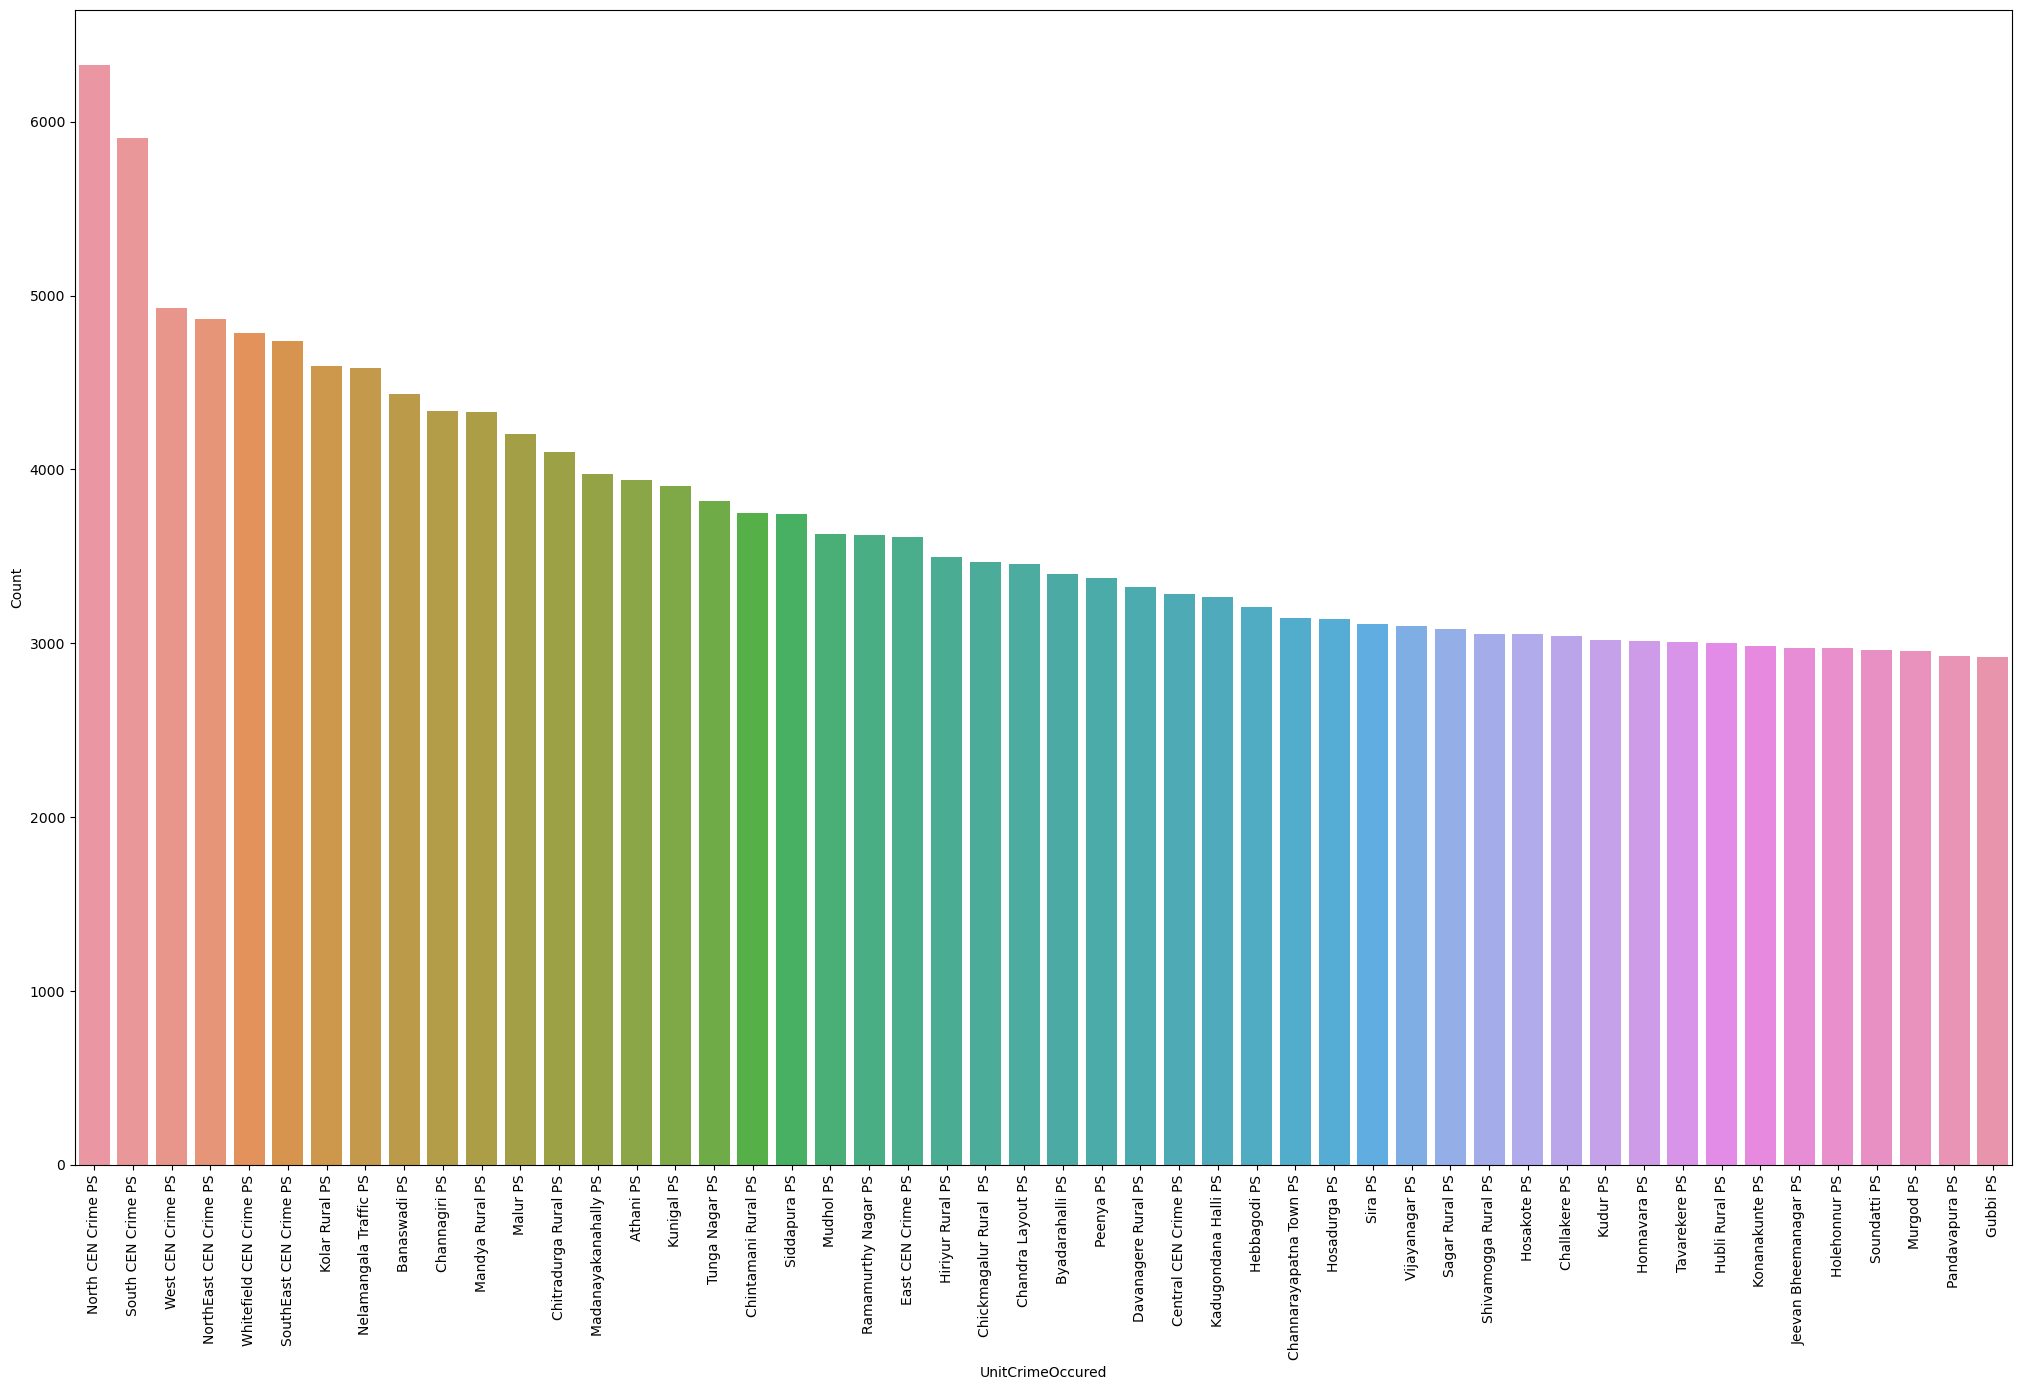

In [33]:
df2 = pd.DataFrame(columns = ['UnitCrimeOccured'])
df2["UnitCrimeOccured"]=[each for each in df.UnitName.unique()]
df2["Count"]=[len(df[df.UnitName==each]) for each in df2.UnitCrimeOccured]
df2=df2.sort_values(by=['Count'],ascending=False)

plt.figure(figsize=(25,15))
sns.barplot(x=df2.UnitCrimeOccured.head(50), y=df2.Count.head(50))
plt.xticks(rotation= 90)
plt.xlabel('UnitCrimeOccured')
plt.ylabel('Count')
plt.show()

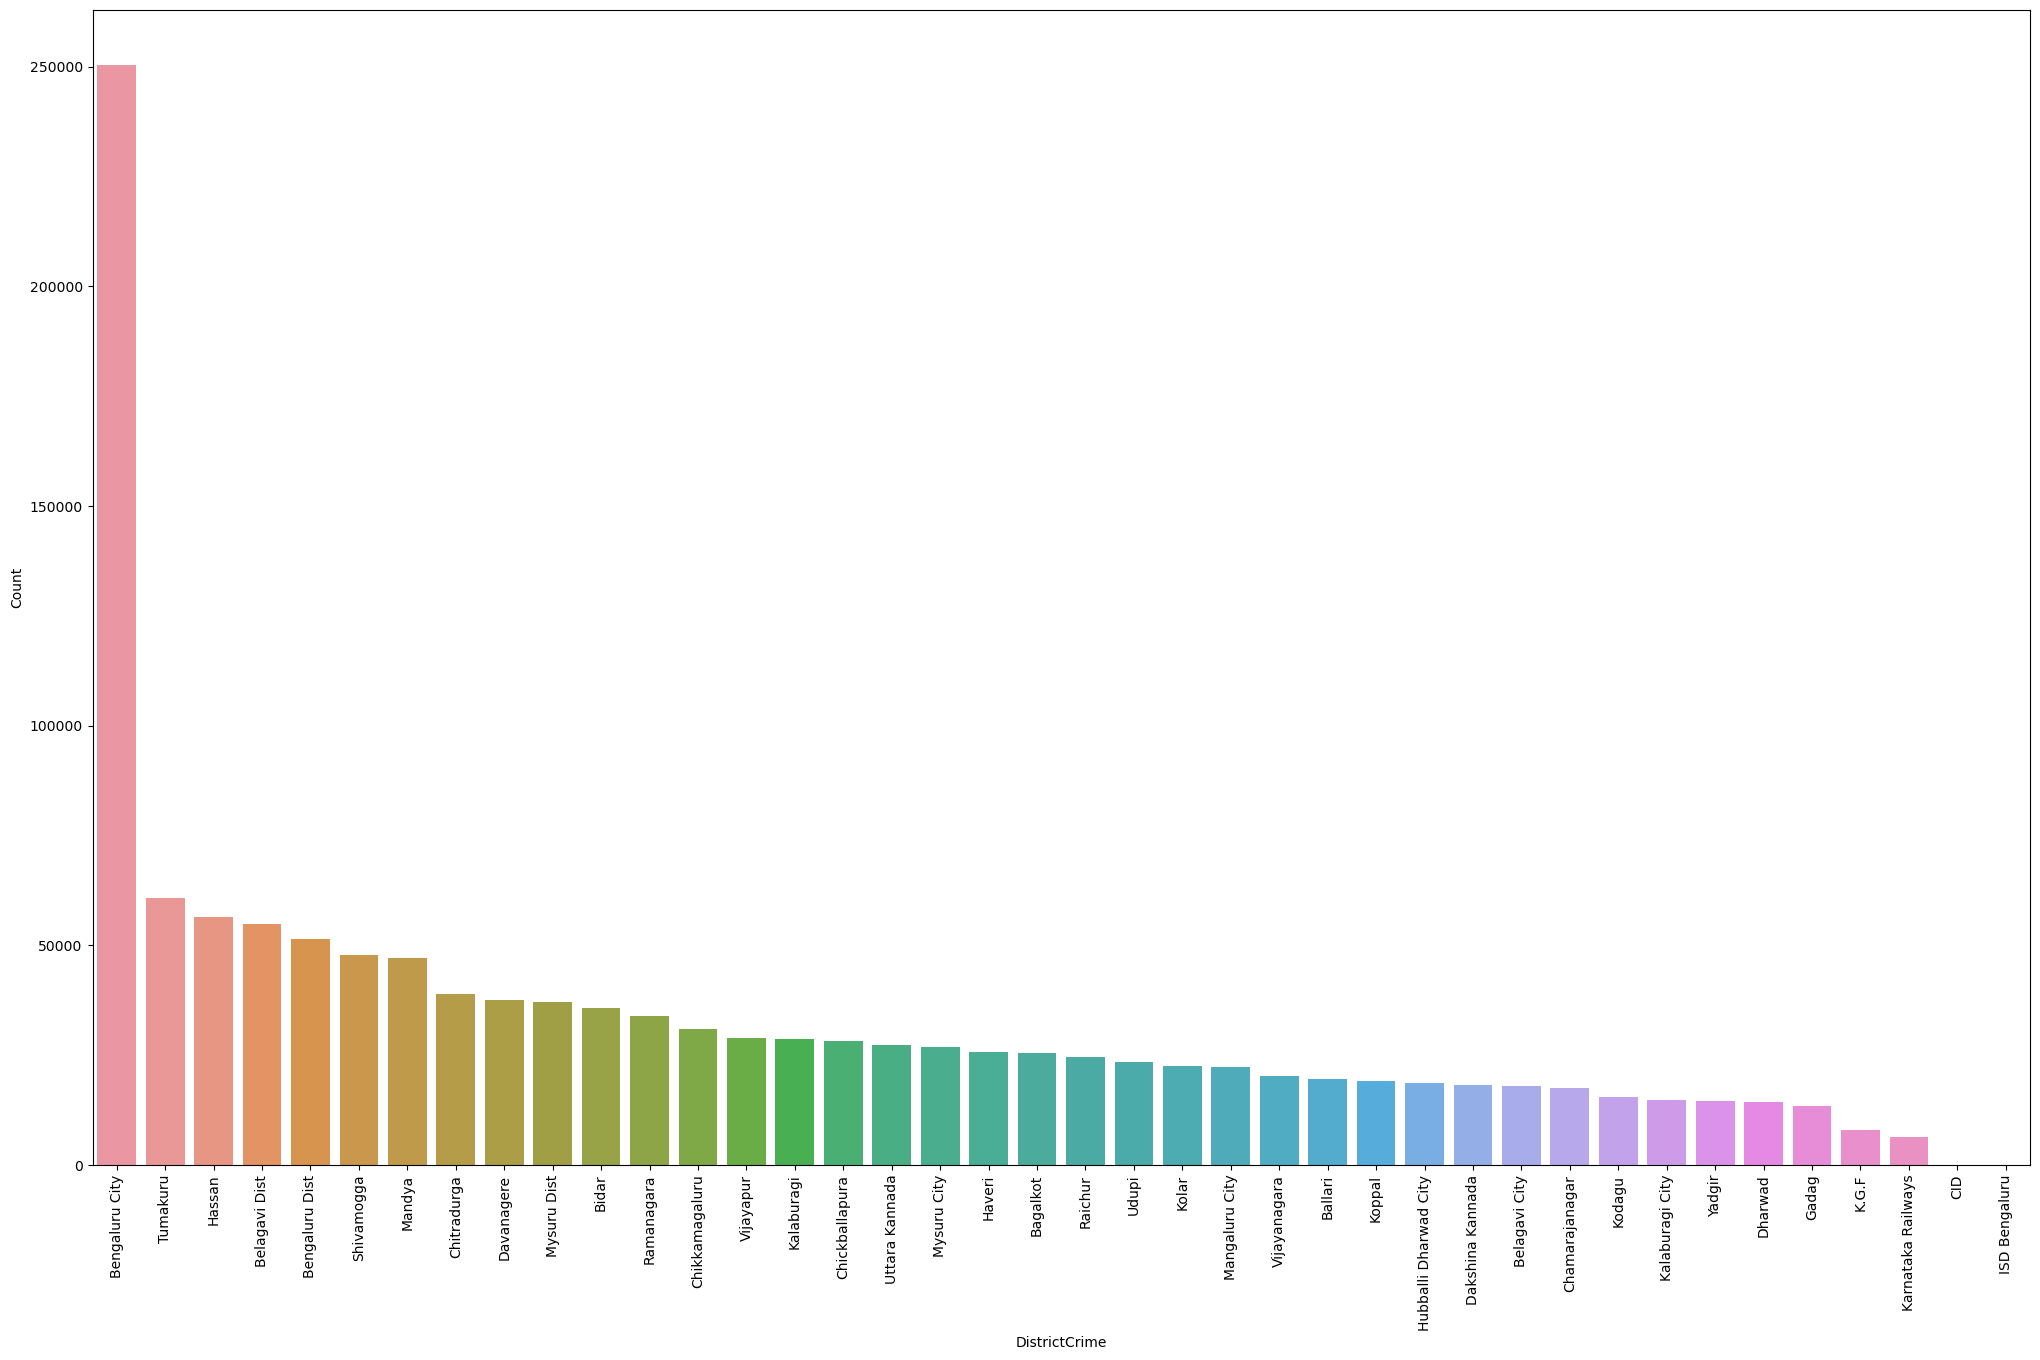

In [34]:
df2 = pd.DataFrame(columns = ['DistrictCrime'])
df2["DistrictCrime"]=[each for each in df.District_Name.unique()]
df2["Count"]=[len(df[df.District_Name==each]) for each in df2.DistrictCrime]
df2=df2.sort_values(by=['Count'],ascending=False)

plt.figure(figsize=(25,15))
sns.barplot(x=df2.DistrictCrime.head(50), y=df2.Count.head(50))
plt.xticks(rotation= 90)
plt.xlabel('DistrictCrime')
plt.ylabel('Count')
plt.show()

In [35]:
df.age.unique()

array([ 60,  40,  20,  18,  34,  35,  11,  21,  50,   7,   9,  36,  55,
        30,  54,  28,  25,  43,  44,   6,  48,  31,  32,  62,  26,  65,
        17,  19,   0,  22,  42,  24,  56,  33,  45,  38,  29,  63,  12,
        14,  15,  16,  23,   1,  67,  47,  46,  27,  52,  39,  70,  58,
        37,  68,  61,   4,  80,  74,  53,  51,   3,  10,  59,  41,  72,
        90,  13,  66,   2,  57,  49,  64,   8,  83,  82,  75,  71,   5,
        76,  78,  73,  69,  79,  86,  85,  94,  77,  87,  84,  81, 105,
        92,  95, 102,  93, 101,  89,  91, 100,  96,  88,  99,  98,  97,
       104, 103, -18, -19, 110, 665, 448, 109, 120], dtype=int64)

In [36]:
df=df.replace([0],np.nan)

In [37]:
round_Values = round(df.age.mean())
df.age.fillna(round_Values,inplace=True)

In [38]:
df['age'] = df['age'].apply(lambda x: 15 if 1 <= x <= 10 else (95 if x > 100 else x))

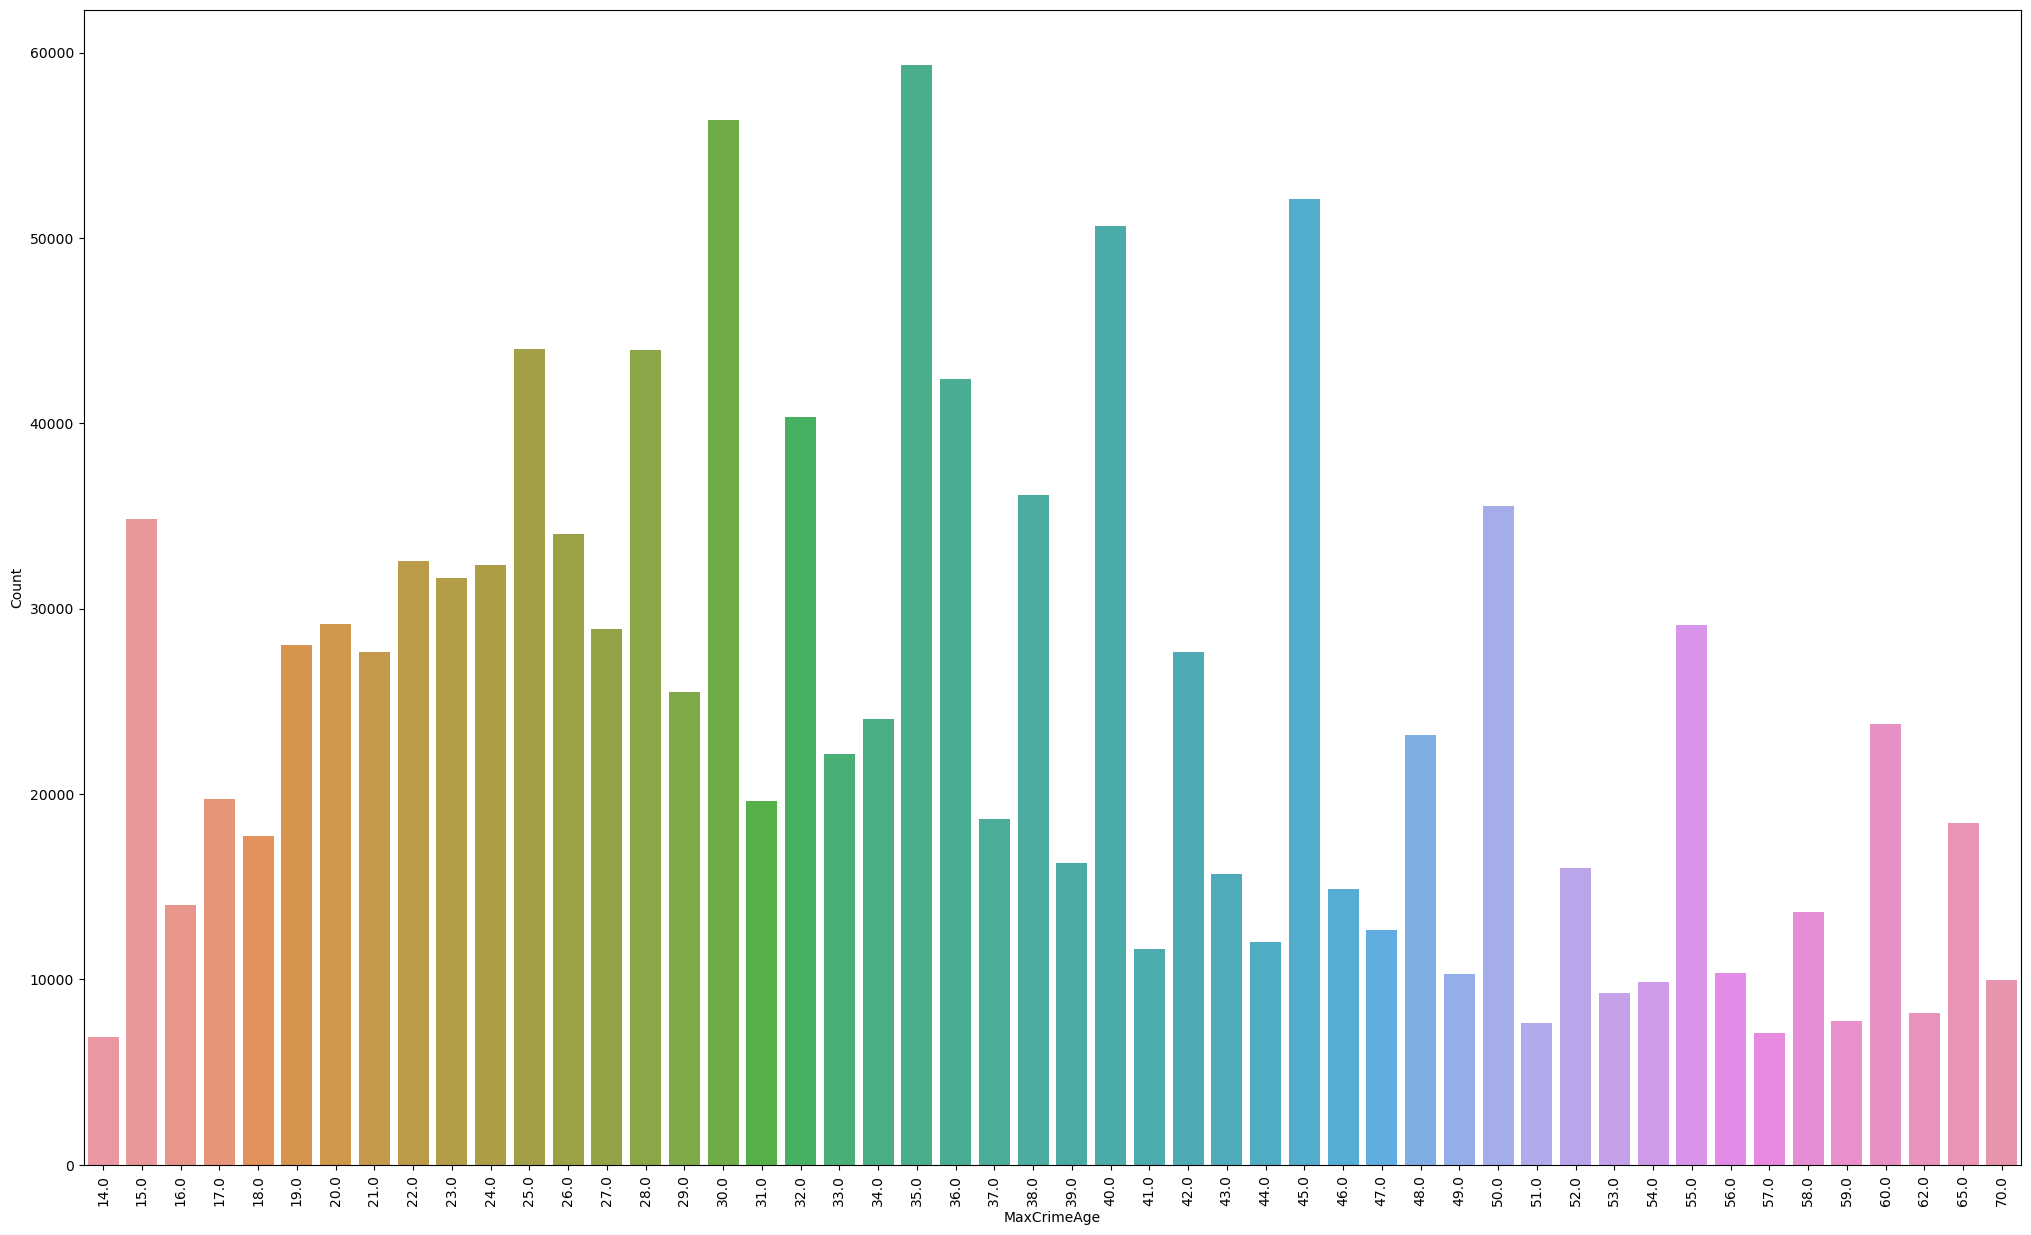

In [39]:
df2 = pd.DataFrame(columns = ['MaxCrimeAge'])
df2["MaxCrimeAge"]=[each for each in df.age.unique()]
df2["Count"]=[len(df[df.age==each]) for each in df2.MaxCrimeAge]
df2=df2.sort_values(by=['Count'],ascending=False)

plt.figure(figsize=(25,15))
sns.barplot(x=df2.MaxCrimeAge.head(50), y=df2.Count.head(50))
plt.xticks(rotation= 90)
plt.xlabel('MaxCrimeAge')
plt.ylabel('Count')
plt.show()

In [40]:
df.PresentAddress.describe()

count     1283279
unique     927530
top             ,
freq        25801
Name: PresentAddress, dtype: object

In [41]:
df=df.replace([','],np.nan)

In [42]:
df=df.replace(['NA,'],np.nan)

In [43]:
df.PresentAddress.describe()

count        1256574
unique        927528
top       NOT KNOWN,
freq             506
Name: PresentAddress, dtype: object

In [44]:
df=df.replace(['.,'],np.nan)

In [45]:
df=df.replace(['NOT KNOWN,'],np.nan)

In [46]:
df=df.replace(['Not Known,'],np.nan)

In [47]:
df=df.replace(['-,'],np.nan)

In [48]:
df=df.replace(['Unknown,'],np.nan)

In [49]:
df=df.replace(['N/A,'],np.nan)

In [50]:
df=df.replace(['UNKNOWN,'],np.nan)

In [51]:
df=df.replace(['Not known,'],np.nan)

In [52]:
df.PresentAddress.describe()

count        1254400
unique        927520
top       BANGALORE,
freq             439
Name: PresentAddress, dtype: object

C:\Users\HP\Downloads\Anaconda2023\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


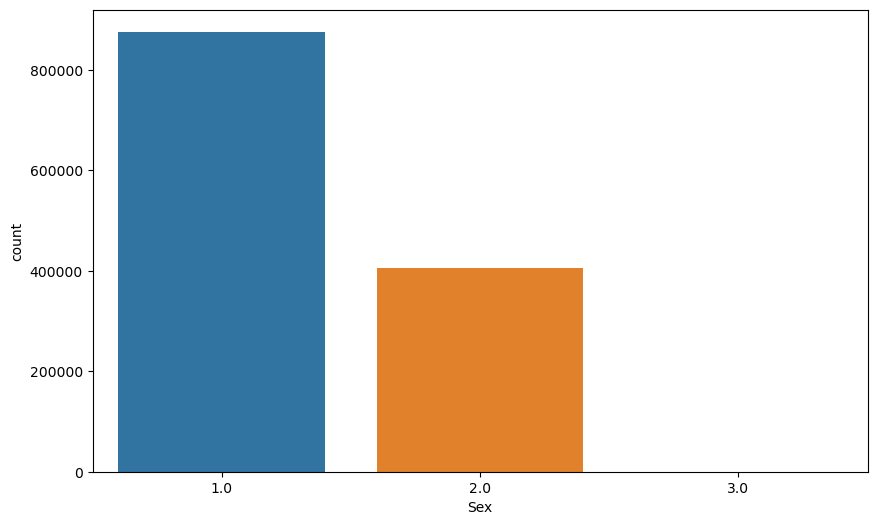

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'Year' column to categorical type
df['Sex'] = df['Sex'].astype('category')

plt.figure(figsize=(10, 6))
sns.countplot(x='Sex', data=df)
plt.show()

In [54]:
df.isnull().sum()

District_Name           0
UnitName                0
FIRNo                   0
Year                    0
Month                   0
VictimName              0
age                     0
Profession              0
Sex                     0
PresentAddress      28879
PresentCity             0
PresentState            0
PermanentCity           0
PermanentState          0
Nationality_Name        0
PersonType              0
InjuryType              0
Crime_No                0
Arr_ID                  0
Victim_ID               0
dtype: int64

In [55]:
df.dropna(subset=['PresentAddress'],inplace=True)

In [56]:
df.InjuryType.unique()

array([2., 3., 1., 4., 5.])

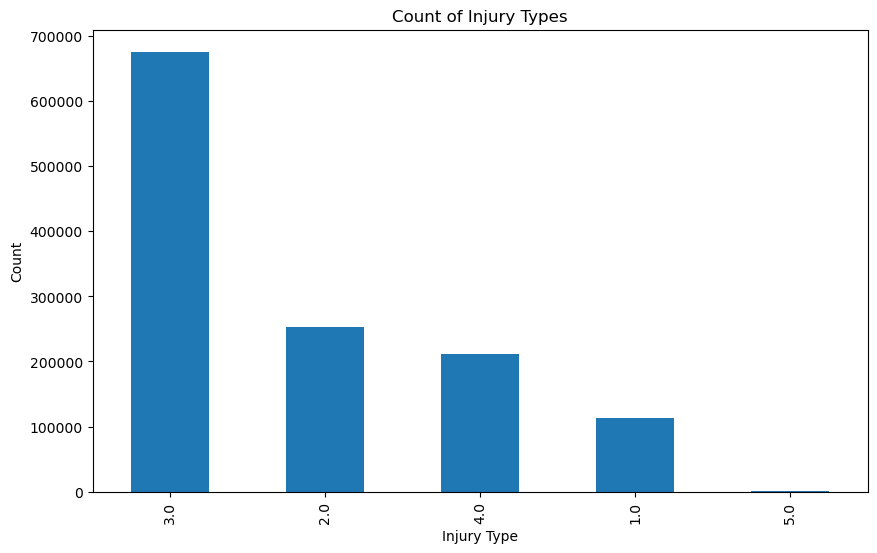

In [57]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the crime data
# Convert 'InjuryType ' to categorical
df['InjuryType'] = df['InjuryType'].astype('category')

# Plot count of 'InjuryType ' using matplotlib
plt.figure(figsize=(10, 6))
df['InjuryType'].value_counts().plot(kind='bar')
plt.xlabel('Injury Type')
plt.ylabel('Count')
plt.title('Count of Injury Types')
plt.show()


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1254400 entries, 5 to 1465782
Data columns (total 20 columns):
 #   Column            Non-Null Count    Dtype   
---  ------            --------------    -----   
 0   District_Name     1254400 non-null  object  
 1   UnitName          1254400 non-null  object  
 2   FIRNo             1254400 non-null  object  
 3   Year              1254400 non-null  int64   
 4   Month             1254400 non-null  int64   
 5   VictimName        1254400 non-null  object  
 6   age               1254400 non-null  float64 
 7   Profession        1254400 non-null  object  
 8   Sex               1254400 non-null  category
 9   PresentAddress    1254400 non-null  object  
 10  PresentCity       1254400 non-null  object  
 11  PresentState      1254400 non-null  object  
 12  PermanentCity     1254400 non-null  object  
 13  PermanentState    1254400 non-null  object  
 14  Nationality_Name  1254400 non-null  object  
 15  PersonType        1254400 non-null  o

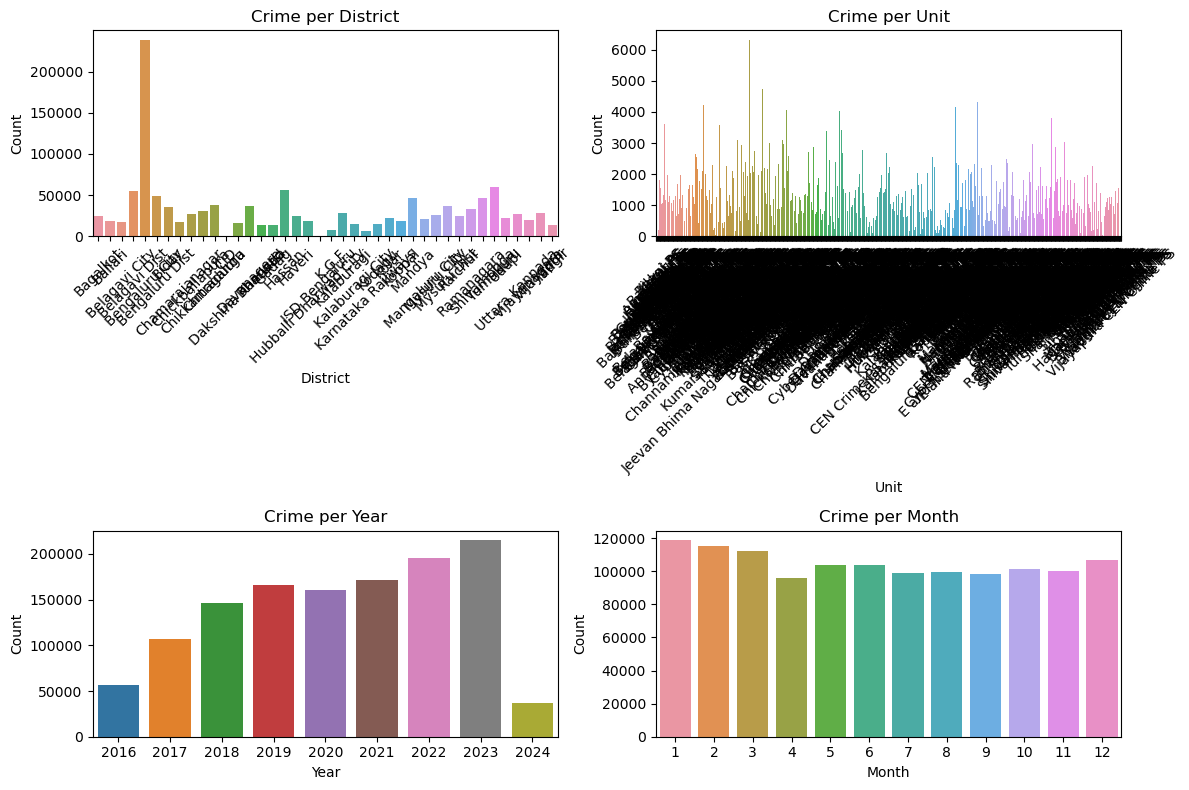

C:\Users\HP\Downloads\Anaconda2023\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\Downloads\Anaconda2023\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


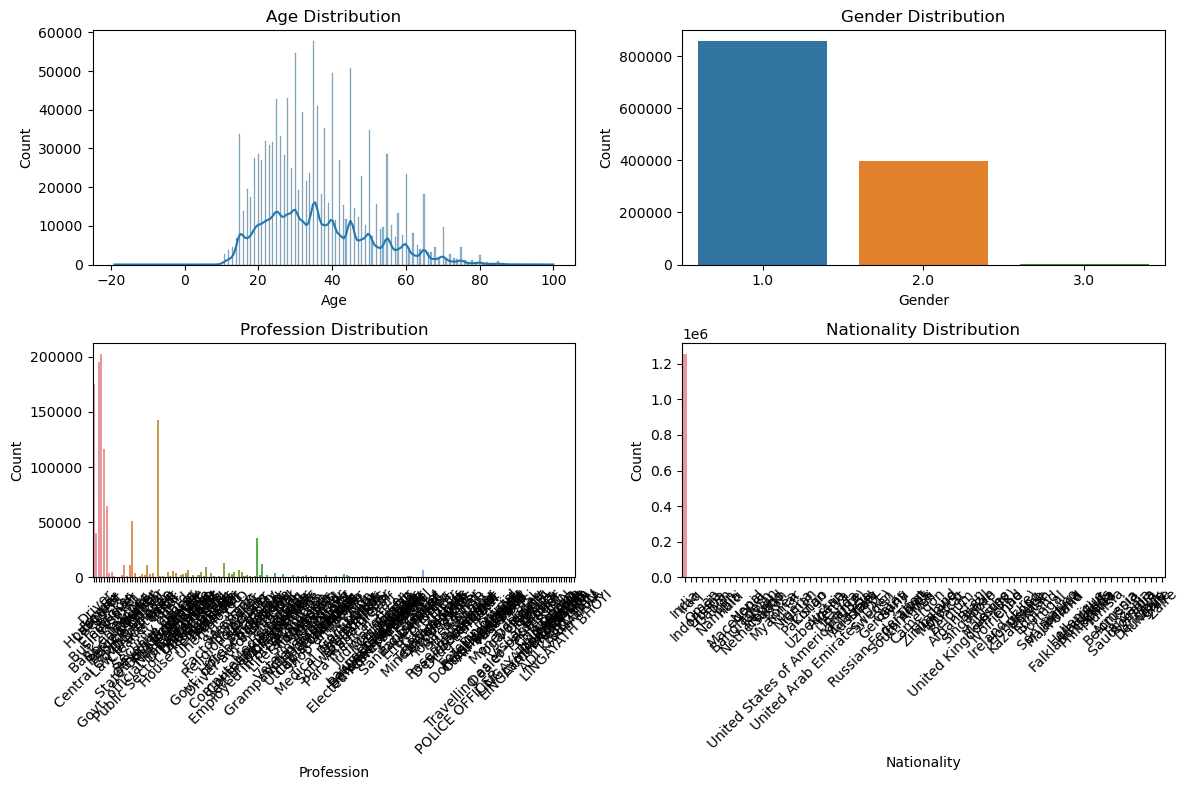

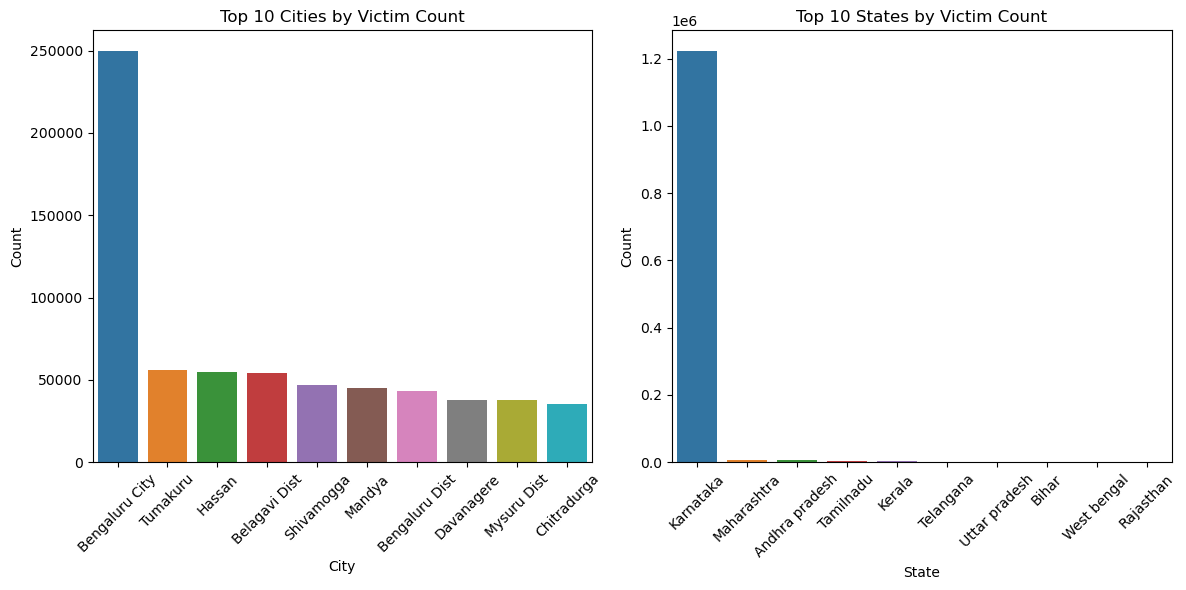

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crime-related features
plt.figure(figsize=(12, 8))
plt.subplot(221)
sns.countplot(x='District_Name', data=df)
plt.title('Crime per District')
plt.xlabel('District')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.subplot(222)
sns.countplot(x='UnitName', data=df)
plt.title('Crime per Unit')
plt.xlabel('Unit')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.subplot(223)
sns.countplot(x='Year', data=df)
plt.title('Crime per Year')
plt.xlabel('Year')
plt.ylabel('Count')

plt.subplot(224)
sns.countplot(x='Month', data=df)
plt.title('Crime per Month')
plt.xlabel('Month')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Victim-related features
plt.figure(figsize=(12, 8))
plt.subplot(221)
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

plt.subplot(222)
sns.countplot(x='Sex', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.subplot(223)
sns.countplot(x='Profession', data=df)
plt.title('Profession Distribution')
plt.xlabel('Profession')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.subplot(224)
sns.countplot(x='Nationality_Name', data=df)
plt.title('Nationality Distribution')
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Geographical features
plt.figure(figsize=(12, 6))
plt.subplot(121)
sns.countplot(x='PresentCity', data=df, order=df['PresentCity'].value_counts().iloc[:10].index)
plt.title('Top 10 Cities by Victim Count')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.subplot(122)
sns.countplot(x='PresentState', data=df, order=df['PresentState'].value_counts().iloc[:10].index)
plt.title('Top 10 States by Victim Count')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1254400 entries, 5 to 1465782
Data columns (total 20 columns):
 #   Column            Non-Null Count    Dtype   
---  ------            --------------    -----   
 0   District_Name     1254400 non-null  object  
 1   UnitName          1254400 non-null  object  
 2   FIRNo             1254400 non-null  object  
 3   Year              1254400 non-null  int64   
 4   Month             1254400 non-null  int64   
 5   VictimName        1254400 non-null  object  
 6   age               1254400 non-null  float64 
 7   Profession        1254400 non-null  object  
 8   Sex               1254400 non-null  category
 9   PresentAddress    1254400 non-null  object  
 10  PresentCity       1254400 non-null  object  
 11  PresentState      1254400 non-null  object  
 12  PermanentCity     1254400 non-null  object  
 13  PermanentState    1254400 non-null  object  
 14  Nationality_Name  1254400 non-null  object  
 15  PersonType        1254400 non-null  o

In [61]:
victim_df=df

In [62]:
df.to_csv('preprocessed_df4.csv', index=False)

PermissionError: [Errno 13] Permission denied: 'preprocessed_df4.csv'